# Pareto distribution

- Probability density function (p.d.f)   
    If $X$ is a Pareto's random variable. The probability density function is defined as
    
$$f_X(x) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}}; \quad x\geq x_m$$

where $x_m$ is the minimum possible value.

---
- Expectation  
The expectation of a random variable $X$ with the probability density function $f_X(x)$ is given by:

$$\begin{align}
E[x\vert x>x_m] &= \int_{-\infty}^\infty x\cdot f_X(x)dx\\\\
&= \int_{x_m}^\infty x\cdot \frac{\alpha x_m^\alpha}{x^{\alpha+1}}dx\\\\
&= \alpha x_m^\alpha \int_{x_m}^\infty \frac{x}{x^{\alpha+1}}dx\\\\
&= \alpha x_m^\alpha \int_{x_m}^\infty x^{-\alpha} dx\\\\
&= \alpha x_m^\alpha \left[\frac{x^{1-\alpha}}{1-\alpha}\right]^\infty_{x_m}\\\\
&= \alpha x_m^\alpha\cdot\left[0 - \frac{x_m^{1-\alpha}}{1-\alpha}\right]\\\\
&= \alpha x_m^\alpha\cdot\frac{x_m^{1-\alpha}}{\alpha - 1}\\\\
&= \frac{\alpha}{\alpha - 1}\cdot x_m
\end{align}$$

---
- Survival Expectation

$$\begin{align}
E[x\vert x>x_m] &= E[x\vert x>x_m] - E[x_m\vert x>x_m]\\\\
&= E[x\vert x>x_m] - x_m\\\\
&= \frac{\alpha}{\alpha - 1}\cdot x_m - x_m\\\\
&= \frac{x_m}{\alpha - 1}
\end{align}$$

In [1]:
survival_expectation = lambda alpha, x_m: x_m / (alpha - 1)

In [2]:
survival_expectation(2, 2000)

2000.0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

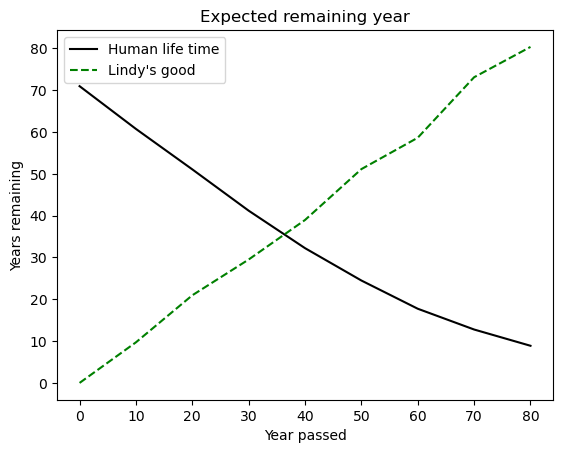

In [4]:
# Conditional Weibull
def sample_w(u, lambda_val, kappa, t_0):
    return (t_0**kappa - lambda_val**kappa * np.log(1 - u))**(1/kappa) - t_0

# Conditional Pareto
def sample_p(u, t_0, alpha=2):
    return t_0 * (1 - u)**(-1/alpha) - t_0

result_w = []
result_p = []

year_range = np.arange(0, 81, 10)

for t in year_range:
    u = np.random.rand(10000)
    samps_w = sample_w(u, 77.1, 5.05, t)
    samps_p = sample_p(u, t)
    result_w.append(np.mean(samps_w))
    result_p.append(np.mean(samps_p))

plt.plot(year_range, result_w, label="Human life time", color="black")
plt.plot(year_range, result_p, label="Lindy's good", linestyle="--", color="green")
plt.xlabel("Year passed")
plt.ylabel("Years remaining")
plt.title("Expected remaining year")
plt.legend()
plt.show()

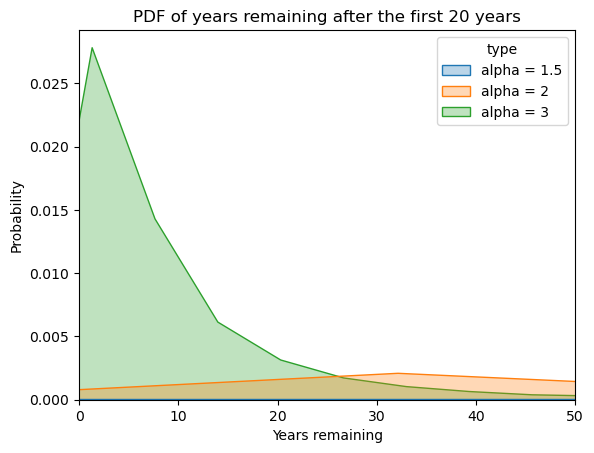

In [5]:
# Changing shape parameter
u = np.random.rand(100000)
samps_p1 = sample_p(u, 20, alpha=2)
samps_p2 = sample_p(u, 20, alpha=1.5)
samps_p3 = sample_p(u, 20, alpha=3)

df = pd.DataFrame({"type": np.repeat(["alpha = 1.5", "alpha = 2", "alpha = 3"], 100000),
                   "value": np.concatenate([samps_p2, samps_p1, samps_p3])})

plt.figure()
sns.kdeplot(data=df, x="value", hue="type", fill=True, alpha=0.3)
plt.xlim(0, 50)
plt.title("PDF of years remaining after the first 20 years")
plt.xlabel("Years remaining")
plt.ylabel("Probability")
plt.show()

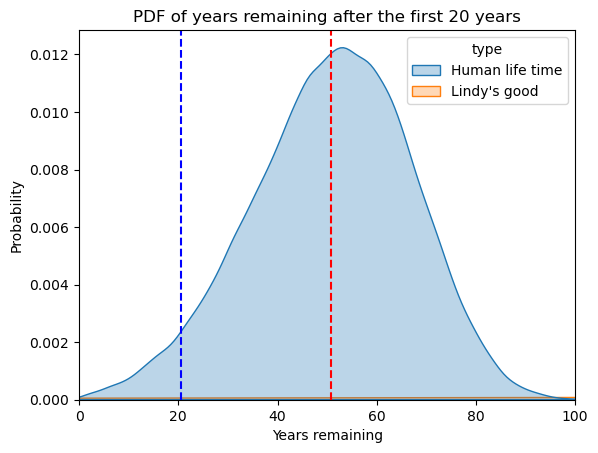

In [6]:
# After 20 years
u = np.random.rand(100000)
samps_w = sample_w(u, 77.1, 5.05, 20)
mean_w = np.mean(samps_w)
samps_p = sample_p(u, 20)
mean_p = np.mean(samps_p)

df_after_20 = pd.DataFrame({"type": np.repeat(["Human life time", "Lindy's good"], 100000),
                            "value": np.concatenate([samps_w, samps_p])})

plt.figure()
sns.kdeplot(data=df_after_20, x="value", hue="type", fill=True, alpha=0.3)
plt.xlim(0, 100)
plt.title("PDF of years remaining after the first 20 years")
plt.xlabel("Years remaining")
plt.ylabel("Probability")
plt.axvline(x=mean_p, linestyle="--", color="blue")
plt.axvline(x=mean_w, linestyle="--", color="red")
plt.show()